In [6]:
import os, csv, re
import pandas as pd
import numpy as np
import scipy as sp
from scipy.interpolate import interp1d
import matplotlib.pyplot as plt
import matplotlib
import matplotlib.pylab as pylab
import seaborn as sns
from itertools import cycle

sns.set(font_scale=2)
sns.set_style("ticks") #create boxplots
sns.set_context("paper", font_scale=2.5) 

# Turn off the max column width so the HTML 
# image tags don't get truncated 
pd.set_option('display.max_colwidth', -1)

# Turning off the max column will display all the data in
# our arrays so limit the number of element to display
pd.set_option('display.max_seq_items', 3)

plt.rcParams['figure.figsize'] = (8, 6)
get_ipython().magic(u'matplotlib inline')
'''
try: 
    print bokeh_set
    print 'Bokeh already loaded'
    pass
except NameError:
    from bokeh import mpl
    from bokeh.charts import HeatMap
    from bokeh.models import HoverTool, ColumnDataSource
    from bokeh.plotting import figure, output_file, show, output_notebook, output_file
    output_notebook()
    bokeh_set = True
'''    
TOOLS = "pan,hover,save,wheel_zoom,xwheel_zoom,ywheel_zoom"

# image folder
#img_folder = './graphs/'
ext = '.png'


In [7]:
def damk(d, k=1e-3, kg=1e-9, C=1, n=1):
    '''
    return the Damköhler number as a function of interfacial area (a=6/d)
    $Da_{II} = \frac{kC_0^{n-1}}{k_g a}$
    
    '''    
    Da = (k*C**(n-1))/(kg*(6/d))
    
    return Da

1.6666666666666667


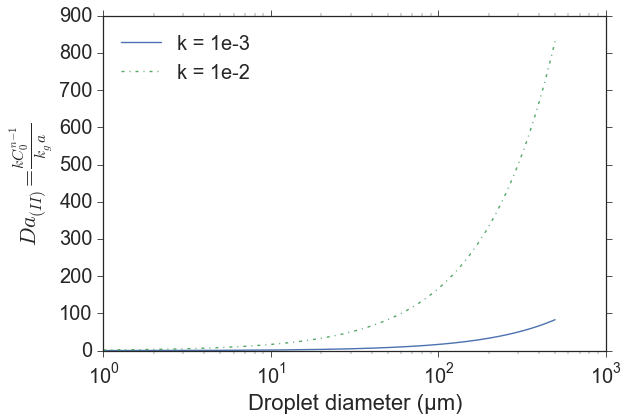

In [8]:
d = np.arange(1,500,1)*1e-6
Da = damk(d)
#plt.xkcd()
print(damk(1e-6,k=1e-2,n=1))
plt.figure(figsize=[9,6])
plt.semilogx(d*1e6,damk(d,k=1e-3,n=1, C=1), label='k = 1e-3')
plt.semilogx(d*1e6,damk(d,k=1e-2,n=1, C=1), label='k = 1e-2',linestyle = '-.')
#plt.vlines(30,0, 1e4, linestyle = '--')
plt.hlines(50.,xmin=0., xmax=1e3)
plt.xlabel('Droplet diameter (µm)')
#plt.ylim([1,10])
#plt.text(100,2,r'$n=1,k_g=1e-9$',fontdict={'size':18})
#plt.text(40,4,r'30 µm',fontdict={'size':18})
plt.legend(loc='best')
plt.ylabel(r'$Da_{(II)}=\frac{kC_0^{n-1}}{k_g a}$')
plt.savefig('Damkohler.png', dpi=300,bbox_inches='tight')

In [4]:
def fitting(a,vareps=range(0,100)):
    y = a*vareps**0.65
    return y

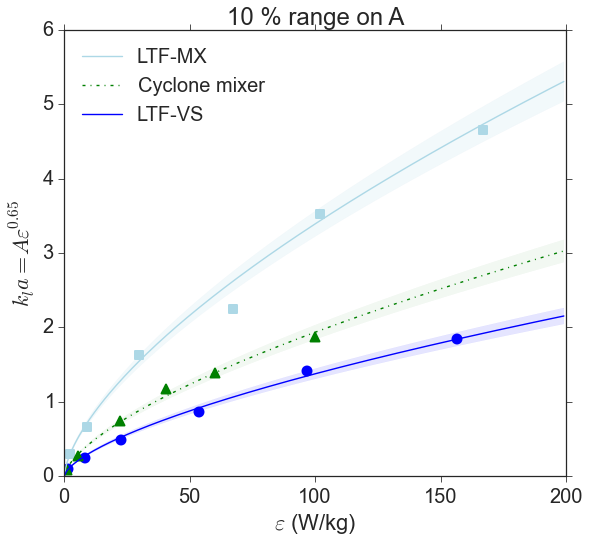

In [9]:
#plt.xkcd()
data = pd.read_csv('ButanolNaarWater.csv', sep='\t')
grouped = data.groupby('mixer')

vareps= np.arange(0,200)
#0.17
#0.097
#0.069
plt.figure(figsize=[9,8])

for group in grouped:
    #print(group[0])
    
    if group[0].lower() == 'ltf-mx': 
        marker = 's'
        c = 'lightblue'
    if group[0].lower() == 'potmixer': 
        marker = '^'
        c = 'green'
    if group[0].lower() == 'ltf-vs': 
        marker = 'o'
        c = 'blue'
    plt.scatter(group[1]['Pm'], group[1]['KlA'], color = c, marker= marker,
                linewidth=2, s=80, facecolors='none')
    
plt.fill_between(vareps,fitting(0.17*0.95, vareps),fitting(0.17*1.05, vareps), 
                 alpha=0.15, color='lightblue')
plt.plot(vareps,fitting(0.17, vareps), label='LTF-MX', color='lightblue')

plt.fill_between(vareps,fitting(0.097*0.95, vareps),fitting(0.097*1.05, vareps),
                 alpha=0.05, color='green')
plt.plot(vareps,fitting(0.097, vareps), label='Cyclone mixer',linestyle = '-.', color='green')

plt.fill_between(vareps,fitting(0.069*0.95, vareps),fitting(0.069*1.05, vareps),
                 alpha=0.1,color='blue')
plt.plot(vareps,fitting(0.069, vareps), label='LTF-VS', color='blue')
#plt.vlines(30,0, 1e4, linestyle = '--')
plt.xlabel(r'$\varepsilon$ (W/kg)')
plt.ylim([0,6])
plt.xlim([0, 200])
#plt.text(100,2,r'$n=1,k_g=1e-9$',fontdict={'size':18})
#plt.text(40,4,r'30 µm',fontdict={'size':18})
plt.legend(loc='best')
plt.title('10 % range on A')
plt.ylabel(r'$k_la = A\varepsilon^{0.65}$')
plt.savefig('Sensitivity.png', dpi=300,bbox_inches='tight')